# Logistic regression 
This is the jupyter notebook for a binary classification with a logistic regression. 
# (skal skrive mere ,ideen bag ved, hvad vi generelt gør  )

In [29]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import shap

In [30]:
np.random.seed(13212)

In [31]:
df = pd.read_csv('tester-python.csv',sep=';', header=0, decimal=',' )
df

,Anteroposterior 1.1,Anteroposterior 2.1,Vertical 1.1,Vertical 2.1,Transverse.1,Crowding.1,Spacing.1,Tooth shape/size.1\n,Pan 2.1\n,Anteroposterior 1.2,Anteroposterior 2.2,Vertical 1.2,Vertical 2.2,Transverse.2,Crowding.2,Spacing.2,Tooth shape/size.2\n,Pan 2.2\n,Total Row Score C
0,9,0,0,0,6,0,4,0,4,0,0,0,0,6,0,4,0,3,0
1,9,0,0,0,6,1,1,1,3,9,0,2,4,6,0,0,1,3,8
2,0,0,0,0,2,3,1,0,4,0,0,0,0,6,1,3,0,0,9
3,9,0,1,0,6,4,0,1,4,9,0,2,0,6,4,0,1,4,9
4,0,0,0,0,6,0,0,0,4,0,0,0,0,2,0,4,0,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,12,0,3,1,6,4,0,1,4,9,0,0,0,6,3,0,1,0,3
113,9,0,1,0,6,0,3,0,4,9,0,0,0,6,0,3,0,3,3
114,9,0,4,0,0,4,0,0,4,12,0,3,4,6,4,0,0,3,4
115,12,0,0,0,6,3,0,0,4,9,0,0,0,6,4,0,0,4,12


In [32]:
def pin_update(row):
    if row["Total Row Score C"] <= 5:
        return 0
    else:
        return 1

In [33]:
Output = df.apply(pin_update, axis=1)

df['Output'] = Output


df1 = df[["Anteroposterior 1.1",
          'Anteroposterior 2.1',
          'Vertical 1.1',
          'Vertical 2.1',
          'Transverse.1',
          'Crowding.1',
          'Spacing.1',
          'Tooth shape/size.1\n',
          'Pan 2.1\n',
          'Anteroposterior 1.2',
          'Anteroposterior 2.2',
          'Vertical 1.2',
          'Vertical 2.2',
          'Transverse.2',
          'Crowding.2',
          'Spacing.2',
          'Tooth shape/size.2\n',
           'Pan 2.2\n',
          'Output']]



df1 = df1.iloc[1:, :]

df1 = df1.dropna()

target_column = ["Output"]
numerical_column = df1.columns.drop(target_column)
output_rows = df1[target_column]
df1.drop(target_column,axis=1,inplace=True)

scaler = MinMaxScaler()
df1 = scaler.fit_transform(df1)

X_train, X_test, y_train, y_test = train_test_split(df1, output_rows, test_size=0.25, shuffle=True)

We start out by initializing a logistic regression model with the sklearn library. We then fit the model to the training data and make predictions on the test data. We evaluate the model by calculating the accuracy score and the confusion matrix.

In [34]:
logisticRegr = LogisticRegression()
logisticRegr = logisticRegr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
prediction1 = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)

print(score)


0.6551724137931034


Here is a accuracy score of the model.


In [36]:
cm = metrics.confusion_matrix(y_test, prediction1)
predi = []
for i in range(10):
    prediction1 = logisticRegr.predict(X_test)
    cm = metrics.confusion_matrix(y_test, prediction1)
    predi.append(cm)

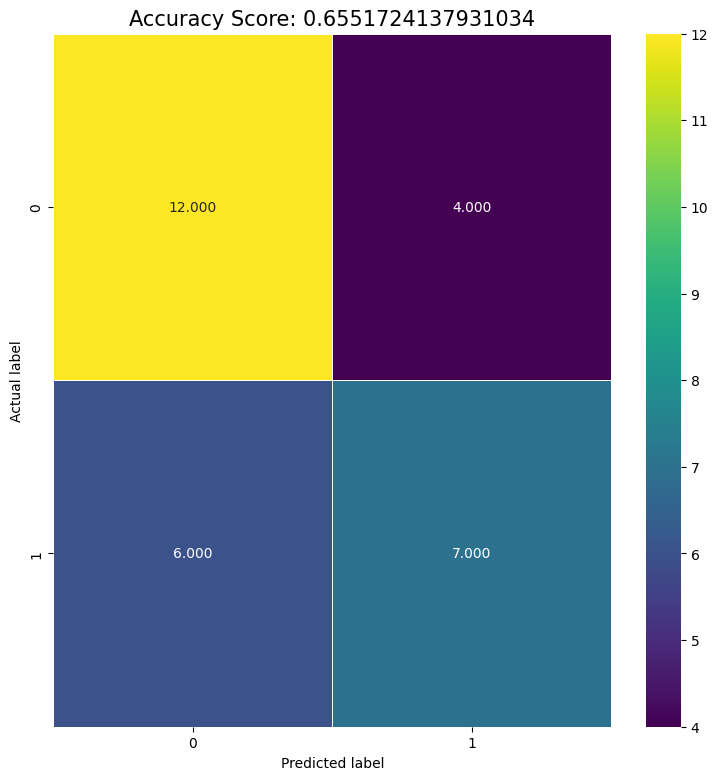

In [37]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = False, cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The confusion matrix shows how the prediction on x_test is compared to the actual value. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are misclassified by the model. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

In [38]:
xnew = np.array([[0, 0, 0, 0, 6, 0, 2, 0 ,0,
                 9, 0, 0, 0, 6, 0, 2, 0, 0]])



logisticRegr.predict_proba(xnew.reshape(1,18))


array([[1.82086829e-07, 9.99999818e-01]])

Here `xnew` is a test case of our model, at the output is the prediction of class. The input mimics the input of which the model is trained on

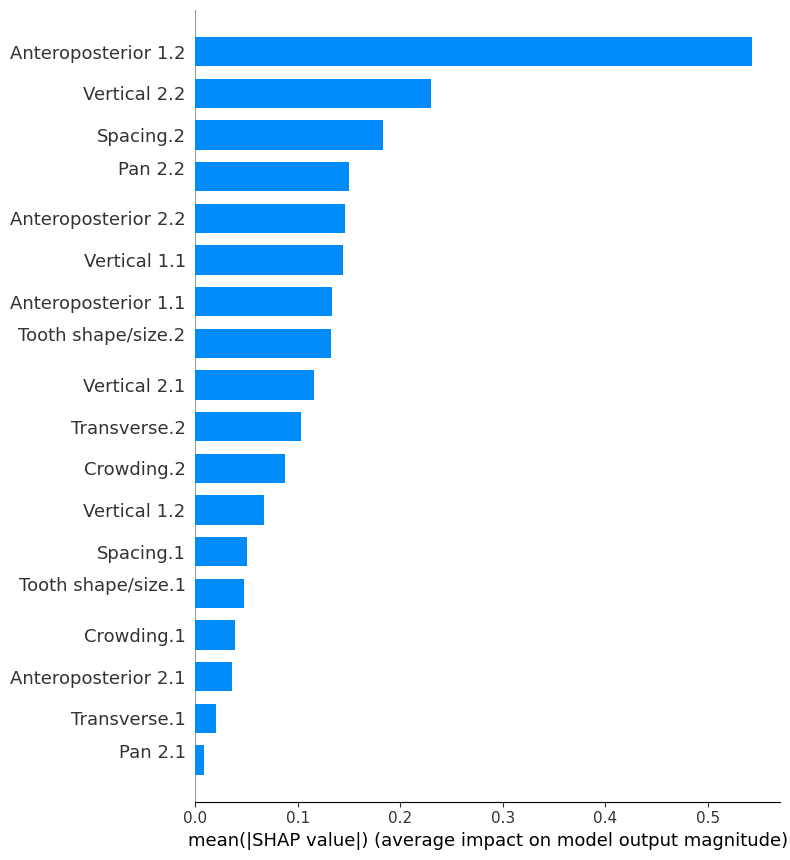

In [39]:
explainer = shap.Explainer(logisticRegr, X_train )
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=df.columns, class_names=[0,1])

The above shap shows what magitude each feature in the model have on the prediction. The higher the magnitude, the more the feature affects the prediction. This is quite relevant for the dentist who wil use our model

# Bootstrap logistic regression

The reason behind a interative logistic regression is to get at more stable result, by taking the mean of multiple models, we get a more stable result. But perhaps not more reliable, this is mostly used in out Streamlit model. because we need a more stable output when the dentist is to use the model and predited outcome of a patient.

In [40]:
acc = []
prediction = []
confusion_matrix = []

for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(df1, output_rows, test_size=0.25, shuffle=True)
    
    clf = LogisticRegression()
    
    clf = clf.fit(X_train, y_train.values.ravel())
    
    pre = clf.predict(X_test)
    
    cm = metrics.confusion_matrix(y_test, pre)
    
    acc.append(clf.score(X_test, y_test))
    confusion_matrix.append(cm)
    prediction.append(pre)
    
print(f"Accuracy: {np.mean(np.array(acc))}")
print(f"Confusion matrix: \n {sum(confusion_matrix)}")


Accuracy: 0.6251724137931035
Confusion matrix: 
 [[1931 1038]
 [1136 1695]]


As the output show the accuracy of the model is more stable and dont fluxate as much as the normal logistic regression model.